Dalton Nickerson<br>
Parallel Programming<br>
May 3, 2017<br>
<h1>Timing Plots for CUDA Trapezoidal Approximation:</h1>
The following code was used to generate the plot from the input text file <em>"timing.txt"</em>.<br>
The data was generated with various problem sizes in doubling length increments with each size being tested 50 times for a more accurate average time measurement.
We begin by opening our data file and reading its contents.

In [12]:
labels = []
data = {}
with open('timingBlockAndCPU.txt','r') as f:
    for line in f:
        line = line.strip()
        params = line.split('\t')
        if len(labels)<1:
            labels = params
            for label in labels:
                data[label] = []
        else:
            for i in range(len(params)):
                    data[labels[i]].append(float(params[i]))
print("Data read successfully.")
print(data)

Data read successfully.
{'CPU': [1.027412, 2.06968, 4.120149, 8.332512, 16.579726, 33.181736, 66.539446, 134.577874, 269.357592, 537.504627], '4': [0.293296, 0.368972, 0.524743, 0.830758, 1.459828, 2.903551, 5.934619, 10.068965, 19.86028, 39.519219], '2': [0.343557, 0.504922, 0.802908, 1.447551, 2.655603, 5.614233, 11.388548, 19.837701, 39.420618, 78.646862], '8': [0.285243, 0.346996, 0.417995, 0.566589, 0.869492, 1.590136, 3.098328, 5.170534, 10.091204, 19.881953], 'Size': [12500.0, 25000.0, 50000.0, 100000.0, 200000.0, 400000.0, 800000.0, 1600000.0, 3200000.0, 6400000.0], '16': [0.293087, 0.326469, 0.384445, 0.445313, 0.596529, 0.967761, 1.701231, 2.728715, 5.180458, 10.73738], '32': [0.319536, 0.347201, 0.364098, 0.416209, 0.497377, 0.673274, 1.035363, 1.550591, 2.77366, 6.191474], '1': [0.468248, 0.768515, 1.390668, 2.667975, 5.098124, 10.780478, 22.548698, 39.967388, 79.031474, 157.04676], '128': [0.377031, 0.434499, 0.409741, 0.409815, 0.415165, 0.498733, 0.546902, 0.740482, 0.98

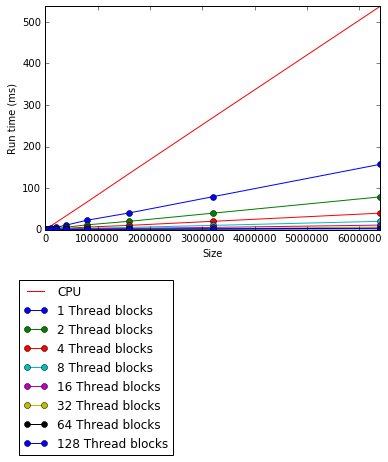

In [37]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(data[labels[0]],data[labels[1]],'r-', label=labels[1])
for i in range(2,len(labels)):
    plt.plot(data[labels[0]],data[labels[i]],'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Run time (ms)")
    plt.xlim([0,data[labels[0]][-1]])
    plt.ylim([0,max(data[labels[1]])])
    lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotAllBlocks.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

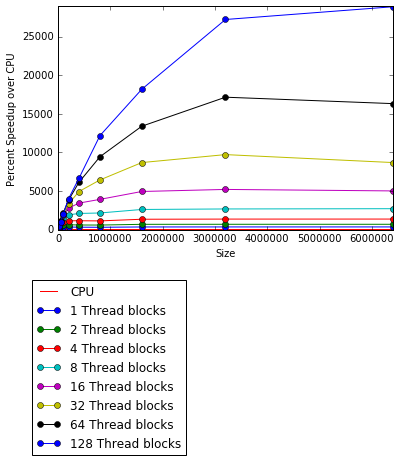

In [34]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0;
plt.plot(data[labels[0]],[100 for x in range(len(data[labels[0]]))],'r-', label=labels[1])
for i in range(2,len(labels)):
    listScaled = [(data[labels[1]][x]/data[labels[i]][x]) * 100 for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    plt.plot(data[labels[0]],listScaled,'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Percent Speedup over CPU")
plt.xlim([0,data[labels[0]][-1]])
plt.ylim([0,maxVal+50])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotSpeedUpAllBlocks.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

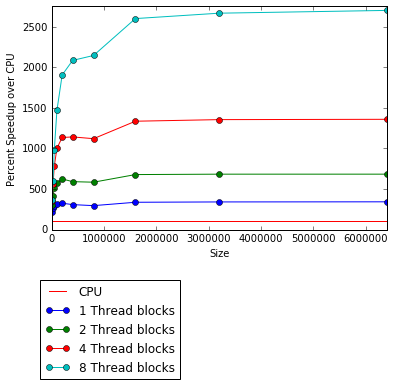

In [38]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0;
plt.plot(data[labels[0]],[100 for x in range(len(data[labels[0]]))],'r-', label=labels[1])
for i in range(2,len(labels)//2+1):
    listScaled = [(data[labels[1]][x]/data[labels[i]][x]) * 100 for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    plt.plot(data[labels[0]],listScaled,'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Percent Speedup over CPU")
plt.xlim([0,data[labels[0]][-1]])
plt.ylim([0,maxVal+50])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotSpeedUpSmallBlocks.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()